In [63]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score, f1_score
# from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [64]:
train = pd.read_csv('../investing_data/numeric_train.csv')
test = pd.read_csv('../investing_data/numeric_test.csv')

In [65]:
def Classification(train, test, target, columns, scaler, model):

    X_train = train[columns]
    y_train = train[target]
    X_test = test[columns]
    y_test = test[target]

    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
    X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    print(f'''
    Accuracy:  {accuracy_score(y_test, pred):.4f}
    Recall:    {recall_score(y_test, pred):.4f}
    Precision: {precision_score(y_test, pred):.4f}
    F1_Score:  {f1_score(y_test, pred):.4f}
    ''')
    print('ConfusionMatrix')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    
    return model

In [66]:
target = 'Samsung_binary'
columns = train.columns[1:5].tolist() + train.columns[13:].tolist()

scaler = StandardScaler()
model = RandomForestClassifier(random_state=0)

model = Classification(train, test, target, columns, scaler, model)


    Accuracy:  0.5241
    Recall:    0.8820
    Precision: 0.5240
    F1_Score:  0.6574
    
ConfusionMatrix
[[ 21 129]
 [ 19 142]]
              precision    recall  f1-score   support

           0       0.53      0.14      0.22       150
           1       0.52      0.88      0.66       161

    accuracy                           0.52       311
   macro avg       0.52      0.51      0.44       311
weighted avg       0.52      0.52      0.45       311



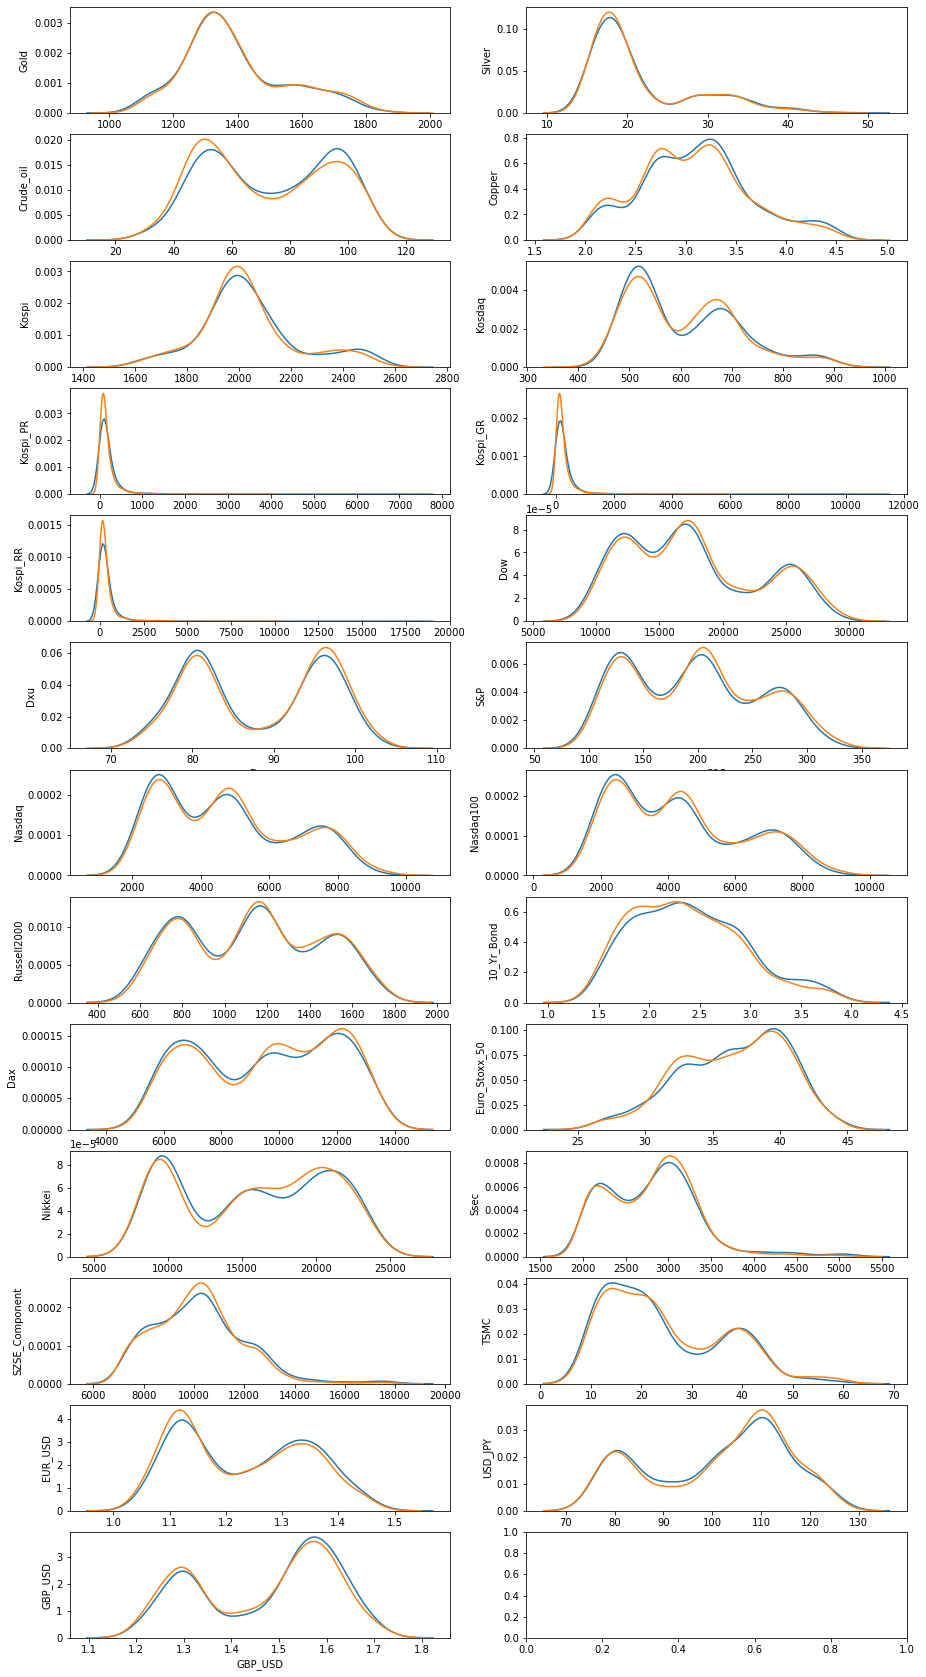

In [92]:
fig, axs = plt.subplots(figsize=(15, 30), ncols=2, nrows=13)

for idx, feature in enumerate(columns[4:29]):
    c = idx % 2
    r = idx // 2
    sns.distplot(train[train['Samsung_binary'] == 0][feature], hist=False, ax=axs[r,c])
    sns.distplot(train[train['Samsung_binary'] == 1][feature], hist=False, ax=axs[r,c])
    axs[r,c].set_ylabel(feature)
plt.show()

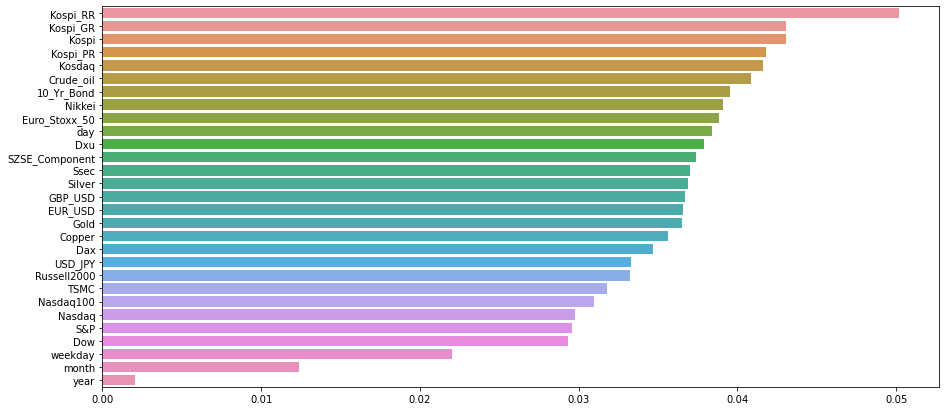

In [67]:
sr = pd.Series(model.feature_importances_, index=columns).sort_values(ascending=False)
plt.figure(figsize=(15,7))
sns.barplot(sr, sr.index)
plt.show()

In [71]:
target = 'Samsung_binary'
col = sr.index[:10].tolist()

scaler = StandardScaler()
model = XGBClassifier(random_state=0)

model = Classification(train, test, target, col, scaler, model)

[05:10:32] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

    Accuracy:  0.5466
    Recall:    0.6708
    Precision: 0.5510
    F1_Score:  0.6050
    
ConfusionMatrix
[[ 62  88]
 [ 53 108]]
              precision    recall  f1-score   support

           0       0.54      0.41      0.47       150
           1       0.55      0.67      0.61       161

    accuracy                           0.55       311
   macro avg       0.55      0.54      0.54       311
weighted avg       0.55      0.55      0.54       311

